# compare OnBeam BNB data to MC-BNB/DATA cosmic overlay 
This is done by fixing two factors:
1. area-normalizing the overlay to match the OnBeam data
2. reweighting the cosmic in the overlay, to match the OnBeam in the preselection stage

and then studying what happens to the OnBeam/overlay comparison after all cuts

In [4]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [5]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/overlay_rescaled_vs_BeamOn/'

In [6]:
versions['data date'] = '2018_05_11'
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'

In [14]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_04_'+versions['data date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_05_'+versions['data date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print "%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume'

OverlayPairsFV, OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
print "%d"%len(OverlaySamples['cosmic'])+' cosmic pairs and %d'%len(OverlaySamples['1mu-1p'])+' mu-p pairs in overlay'

38163 pairs from On-Beam, 24323 in Fiducial Volume
283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%
95259 cosmic pairs and 49707 mu-p pairs in overlay


In [15]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt no delta phi'               
               ,'Pt & delta phi'
              ]


cutlabels = ['preselection'
             ,'$dE/dx$ profile'
             ,'optical filter'
             ,'track lengths'
             ,'collinearity'
             ,'vertex activity'
             ,'coplanarity'
             ,'$p_t$ imbalance'
             ,r'$\Delta \phi $ \&  $p_{t}$'
            ]

reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order)
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.7%,100.0%,12.9%,no cut,100.0% (49707),100.0% (41519),100.0% (95259),100.0% (23996)
Chi2Proton,63.1%,70.7%,68.7%,37.1%,Chi2Proton,63.1% (31389),19.3% (8021),5.2% (5001),68.7% (16481)
MatchedFlash,51.6%,78.1%,56.3%,41.2%,MatchedFlash,51.6% (25634),13.2% (5491),1.8% (1688),56.3% (13510)
length,47.2%,83.5%,52.5%,44.8%,length,47.2% (23459),7.9% (3281),1.4% (1369),52.5% (12600)
non-collinearity,43.1%,87.4%,49.7%,48.7%,non-collinearity,43.1% (21412),5.8% (2409),0.7% (673),49.7% (11926)
vertex activity,31.0%,89.1%,44.2%,61.5%,vertex activity,31.0% (15391),3.7% (1538),0.4% (346),44.2% (10616)
delta phi,20.6%,95.3%,33.7%,75.2%,delta phi,20.6% (10241),0.9% (382),0.1% (118),33.7% (8080)
Pt no delta phi,23.3%,92.4%,36.0%,69.0%,Pt no delta phi,23.3% (11582),1.8% (767),0.2% (185),36.0% (8646)
Pt & delta phi,18.2%,96.3%,30.4%,77.8%,Pt & delta phi,18.2% (9035),0.7% (270),0.1% (79),30.4% (7304)


In [16]:
reducedOnBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to data


## 2.II Changing the cosmic to beam ratio in overlay

### collinearity as a test observable for cosmic rescaling

In [17]:
var='theta_12'
x_label=r'$\theta_{1,2}$ angle between the two tracks [deg.]'
bins=np.linspace(0,180,81)

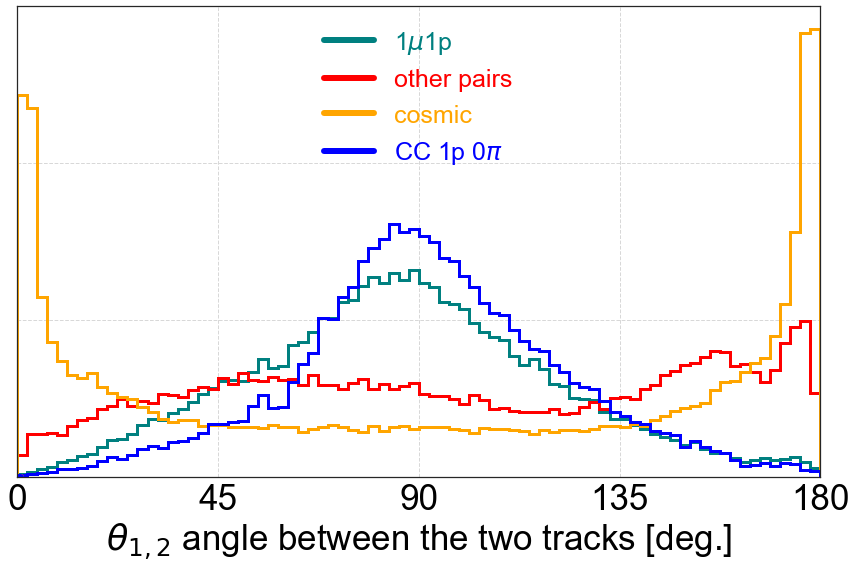

In [18]:
ax=plot_feature_pairs(var=var,x_label=x_label,reduced_samples=reducedOverlay['no cut']
                              ,bins=bins,do_add_legend=True
                              ,figsize=(12,8),fontsize=35,legend_loc='upper center',legend_fontsize=25)
plt.savefig(figures_path+'theta_12_overlay_no_cut.pdf')

# overlay subsamples-scaling

In [19]:
f_Cosmic=0.89
overlay_scalings = dict()
overlay_scalings['N(On) scaling'] = get_samples_scaling( N_total= float(len(OnBeamFV)) # total integral of all overlay                                                                              
                                                        , f_Cosmic=None  # fraction of cosmic in the overlay, need to be in the range 0-1
                                                        , OverlaySubsamples=reducedOverlay['no cut'])
overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic] = get_samples_scaling( N_total= float(len(OnBeamFV)) # total integral of all overlay                                                                        
                                                                                    , f_Cosmic=f_Cosmic  # fraction of cosmic in the overlay, need to be in the range 0-1
                                                                                    , OverlaySubsamples=reducedOverlay['no cut'])
print 'overlay scalings';pp.pprint(overlay_scalings)

overlay scalings
{   'N(On) scaling': {   '1mu-1p': 0.13042872080864412,
                         'CC 1p 0pi': 0.13042872080864415,
                         'cosmic': 0.13042872080864412,
                         'other pairs': 0.13042872080864415},
    'N(On) scaling and f(cosmic)=0.89': {   '1mu-1p': 0.02932859053340056,
                                            'CC 1p 0pi': 0.02932859053340056,
                                            'cosmic': 0.22724855394240964,
                                            'other pairs': 0.029328590533400565}}


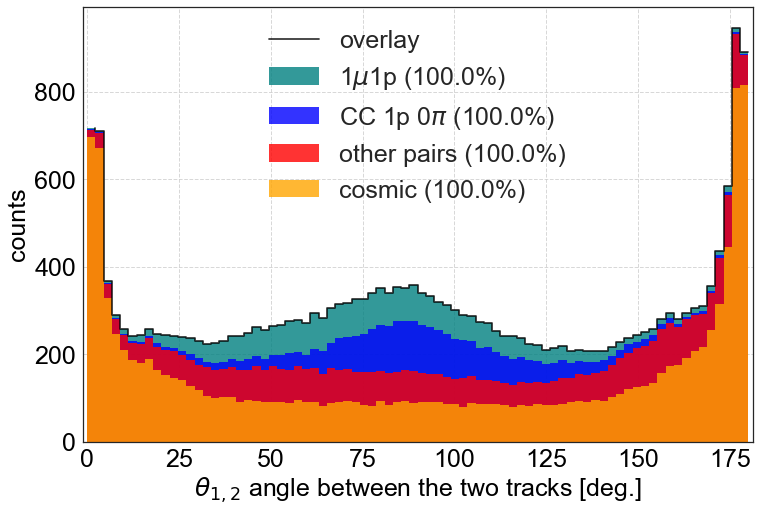

In [20]:
fig,ax=plt.subplots(figsize=(12,8))
plot_stacked_MCsamples( reducedOverlay=reducedOverlay,cut_name='no cut'
                       , overlay_scaling=overlay_scalings['N(On) scaling']
                       , ax=ax, var=var, x_label=x_label,y_label='counts', bins=bins 
                       , fontsize=25                       
                       , do_add_legend=True, stackColor='black',stackLabel='overlay'
                      );
plt.savefig(figures_path+'theta_12_overlay_stacked.pdf')

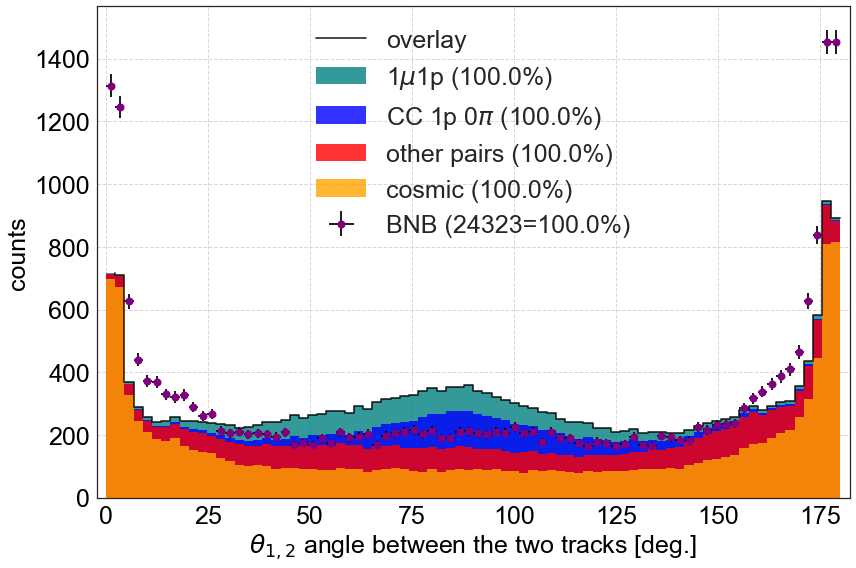

In [21]:
fig,ax=plt.subplots(figsize=(12,8))
plot_stacked_MCsamples( reducedOverlay=reducedOverlay,cut_name='no cut'
                       , overlay_scaling=overlay_scalings['N(On) scaling']
                       , ax=ax, var=var, x_label=x_label,y_label='counts', bins=bins 
                       , fontsize=25                       
                       , stackColor='black',stackLabel='overlay'
                      );
_,h_OnBeam = plot_OnBeam(OnBeamSample=reducedOnBeam['no cut'],OnBeamFV=reducedOnBeam['no cut'],markersize=8
                                 ,color='purple',x_label=x_label, var=var, bins=bins, ax=ax)
ax.legend(fontsize=25)
plt.savefig(figures_path+'theta_12_overlay_stacked_with_BeamOn.pdf')

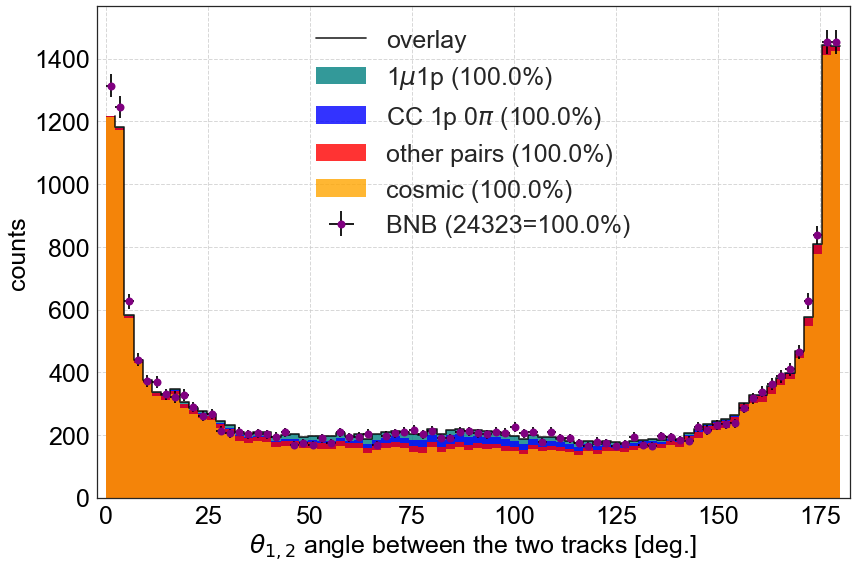

In [22]:
fig,ax=plt.subplots(figsize=(12,8))
plot_stacked_MCsamples( reducedOverlay=reducedOverlay,cut_name='no cut'
                       , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]
                       , ax=ax, var=var, x_label=x_label,y_label='counts', bins=bins 
                       , fontsize=25                       
                       , stackColor='black',stackLabel='overlay'
                      );
_,h_OnBeam = plot_OnBeam(OnBeamSample=reducedOnBeam['no cut'],OnBeamFV=reducedOnBeam['no cut'],markersize=8
                                 ,color='purple',x_label=x_label, var=var, bins=bins, ax=ax)
ax.legend(fontsize=25)
plt.savefig(figures_path+'theta_12_overlay_cosmicRescaled_with_BeamOn.pdf')

# now lets plot all observables before and after the cuts

## $\chi^2_{proton-hypothesis}$

In [136]:
cuts_order  = ['no cut'
#                ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt & delta phi'
              ]
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


preselection : sum of h_OnBeam: 18728 ,sum of h_stack: 18512.3028295
detection + kinematical cuts : sum of h_OnBeam: 480 ,sum of h_stack: 400.718806899


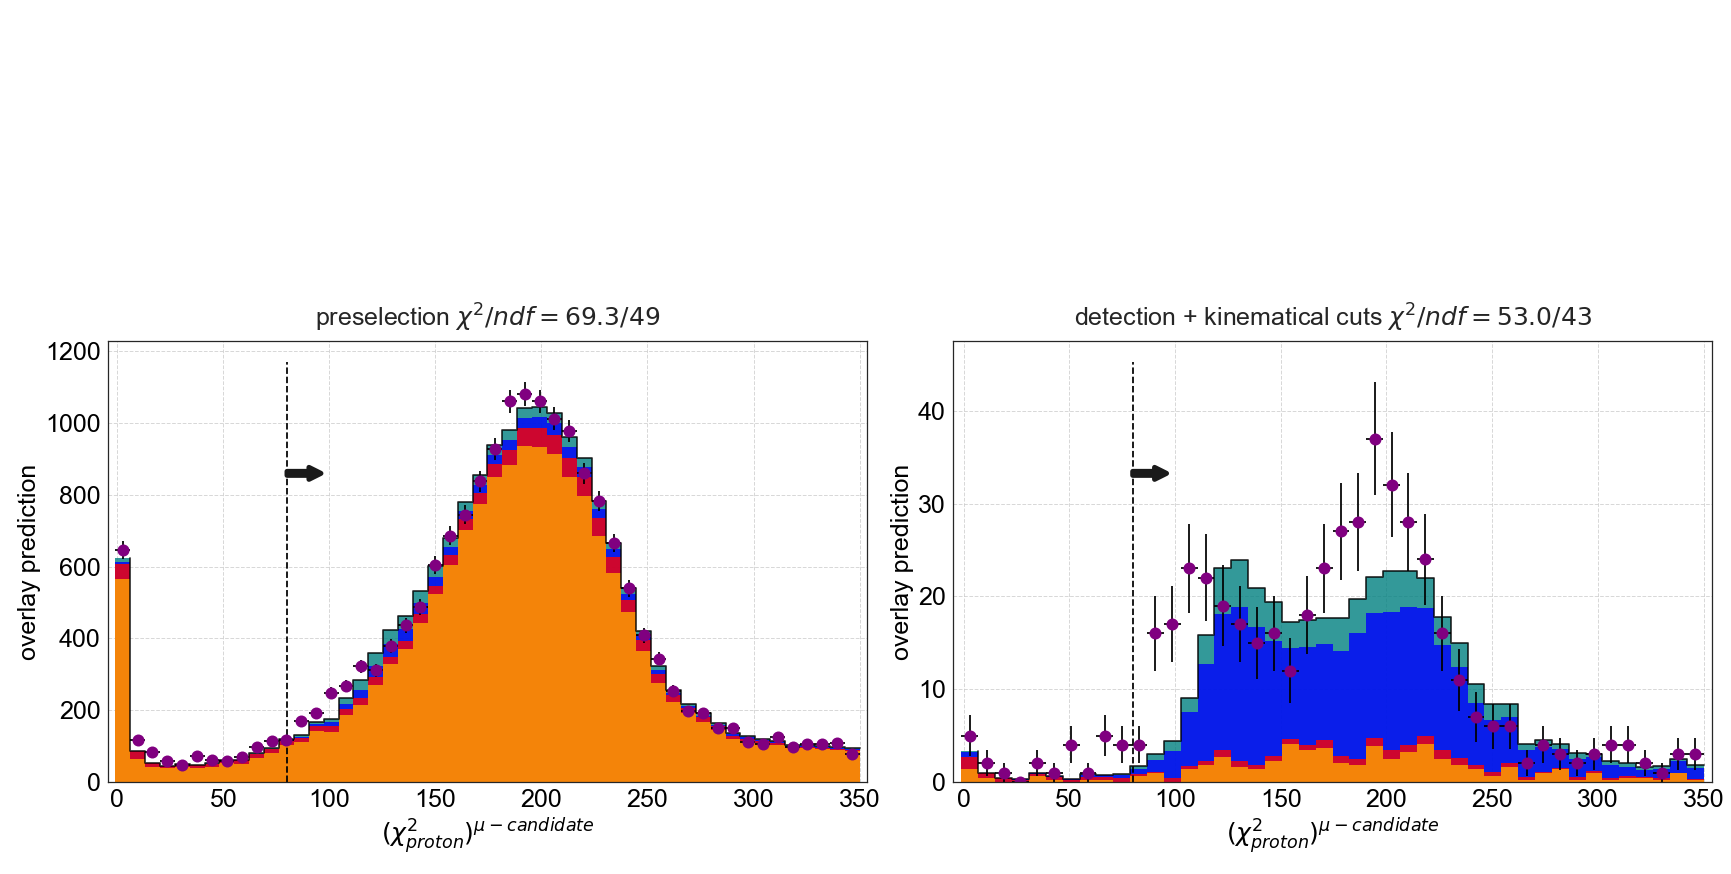

In [137]:
plot_before_after_cuts(var='pidcali_Chi2ProtonYplane_muCandidate'
                       ,x_label=r'$(\chi^2_{proton})^{\mu-candidate}$'
                       ,bins_before_cuts=linspace(-1,350,51)
                       ,last_cut_name='Pt & delta phi'
                       ,bins_after_cuts=linspace(-1,350,45)
                       ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                    
                       ,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
#                        ,xlim_before_cuts=(-1,350)
                       ,chi2_xrange=(-1,350),debug=2,x_varcut=(80,1000)
                   );
plt.savefig(figures_path+'Chi2Proton_muCandidate_before_after_cuts.pdf')

preselection : sum of h_OnBeam: 23371 ,sum of h_stack: 23294.9382684
detection + kinematical cuts : sum of h_OnBeam: 506 ,sum of h_stack: 429.151818922


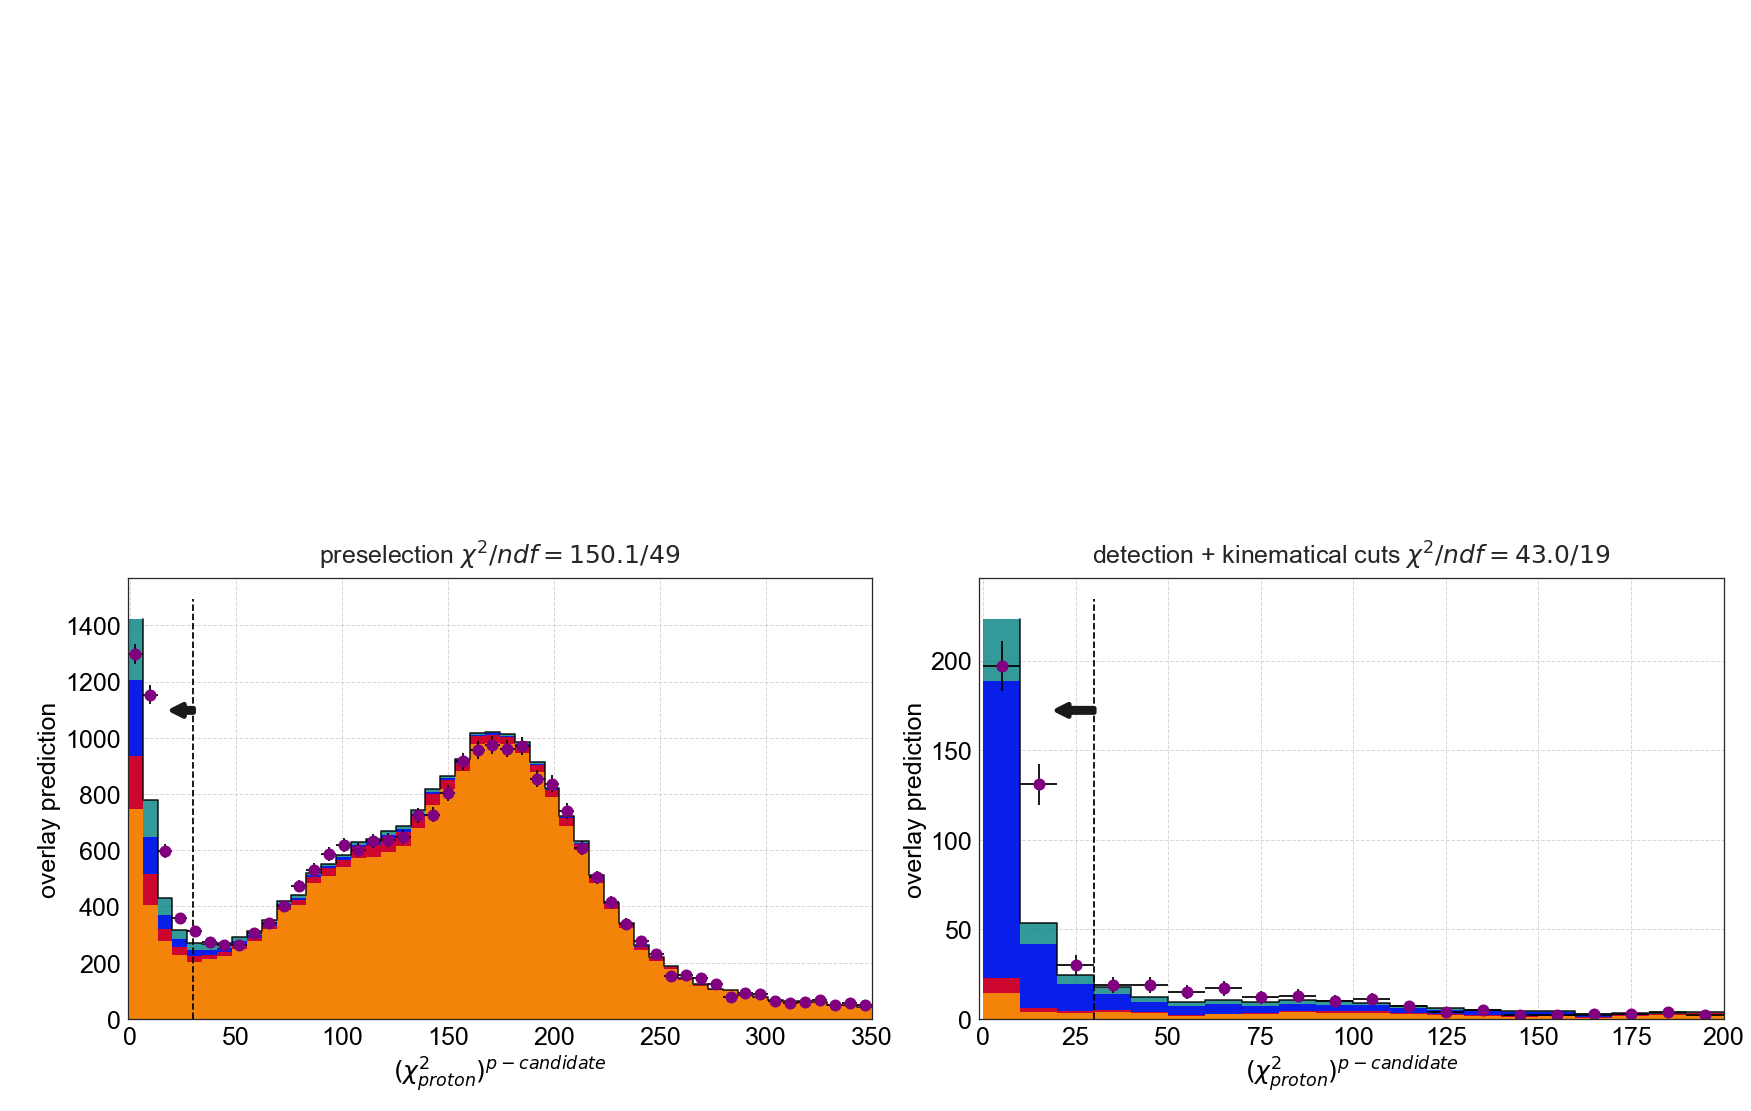

In [143]:
plot_before_after_cuts(var='pidcali_Chi2ProtonYplane_pCandidate'
                       ,x_label=r'$(\chi^2_{proton})^{p-candidate}$'
                       ,bins_before_cuts=linspace(-1,350,51)
                       ,last_cut_name='Pt & delta phi'
                       ,bins_after_cuts=linspace(0,200,21)
                       ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                    
                       ,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                       ,xlim_before_cuts=(-1,350)
                       ,xlim_after_cuts=(-1,200)
                       ,chi2_xrange=(-1,350),debug=2,x_varcut=(-20,30),dx=10
                   );
plt.savefig(figures_path+'Chi2Proton_pCandidate_before_after_cuts.pdf')

## collinearity

In [134]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
#                ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt & delta phi'
              ]
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


preselection : sum of h_OnBeam: 24323 ,sum of h_stack: 24323.0
detection + kinematical cuts : sum of h_OnBeam: 376 ,sum of h_stack: 325.934742854


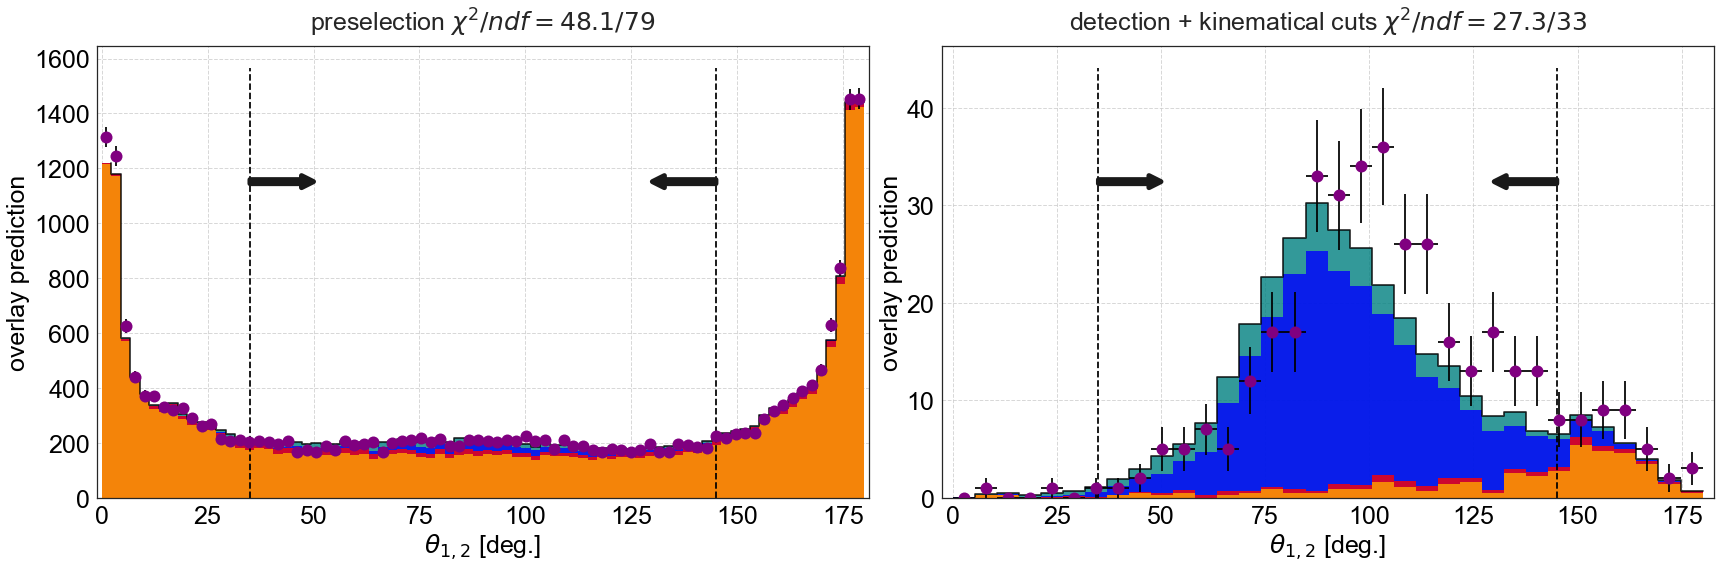

In [135]:
plot_before_after_cuts(var='theta_12',x_label= r'$\theta_{1,2}$ [deg.]'
                       ,bins_before_cuts=linspace(0,180,81)
                       ,last_cut_name='Pt & delta phi'
                       ,bins_after_cuts=linspace(0,180,35)
                       ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                    
                       ,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                       ,chi2_xrange=(0,180),debug=2,x_varcut=(35,145),dx=15
                   );
plt.savefig(figures_path+'theta_12_before_after_cuts.pdf')

## PMT information

In [107]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
#                ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt & delta phi'
              ]
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


dx: 300
dx: 300
saved  /Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/overlay_rescaled_vs_BeamOn/MatchedFlash_TotalPE_before_after_cuts.pdf
dx: 300
dx: 300
saved  /Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/overlay_rescaled_vs_BeamOn/MatchedFlash_TotalPE_log_before_after_cuts.pdf
dx: 40.0
dx: 40.0
saved  /Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/overlay_rescaled_vs_BeamOn/MatchedFlash_YZdistance_before_after_cuts.pdf


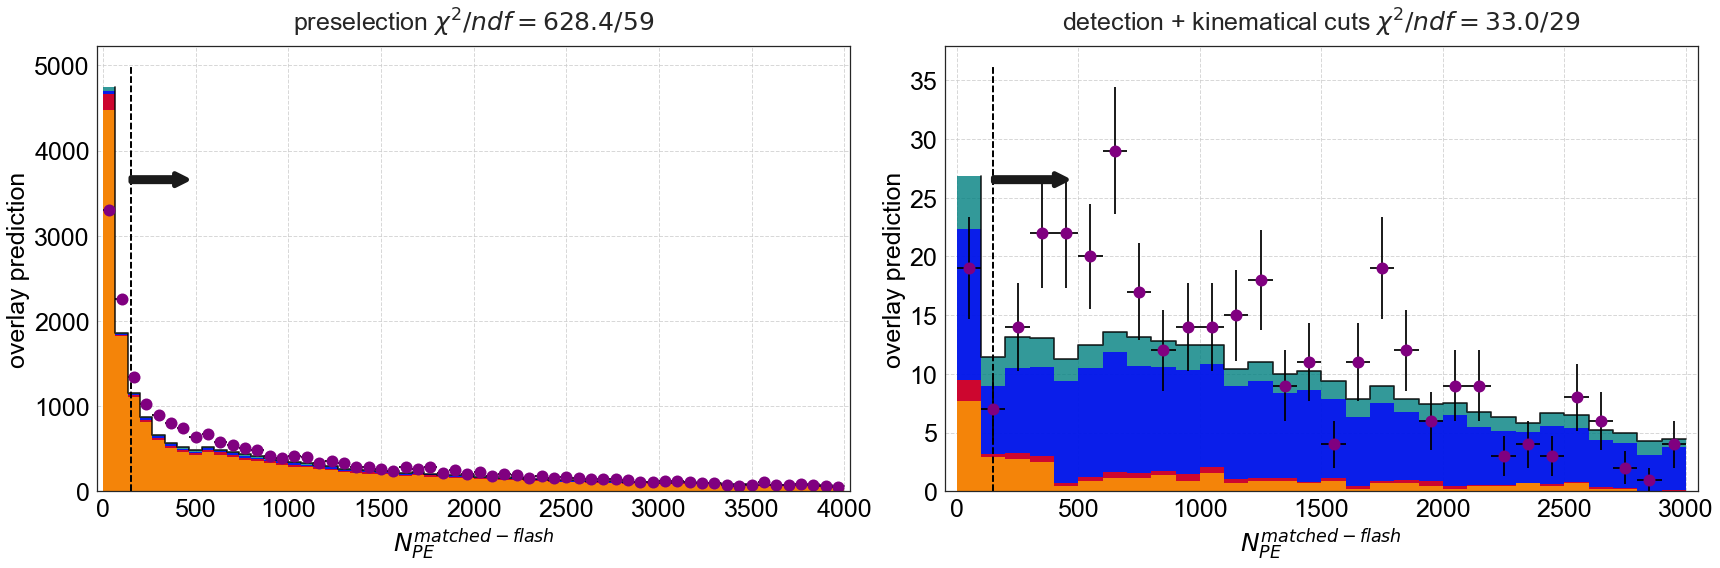

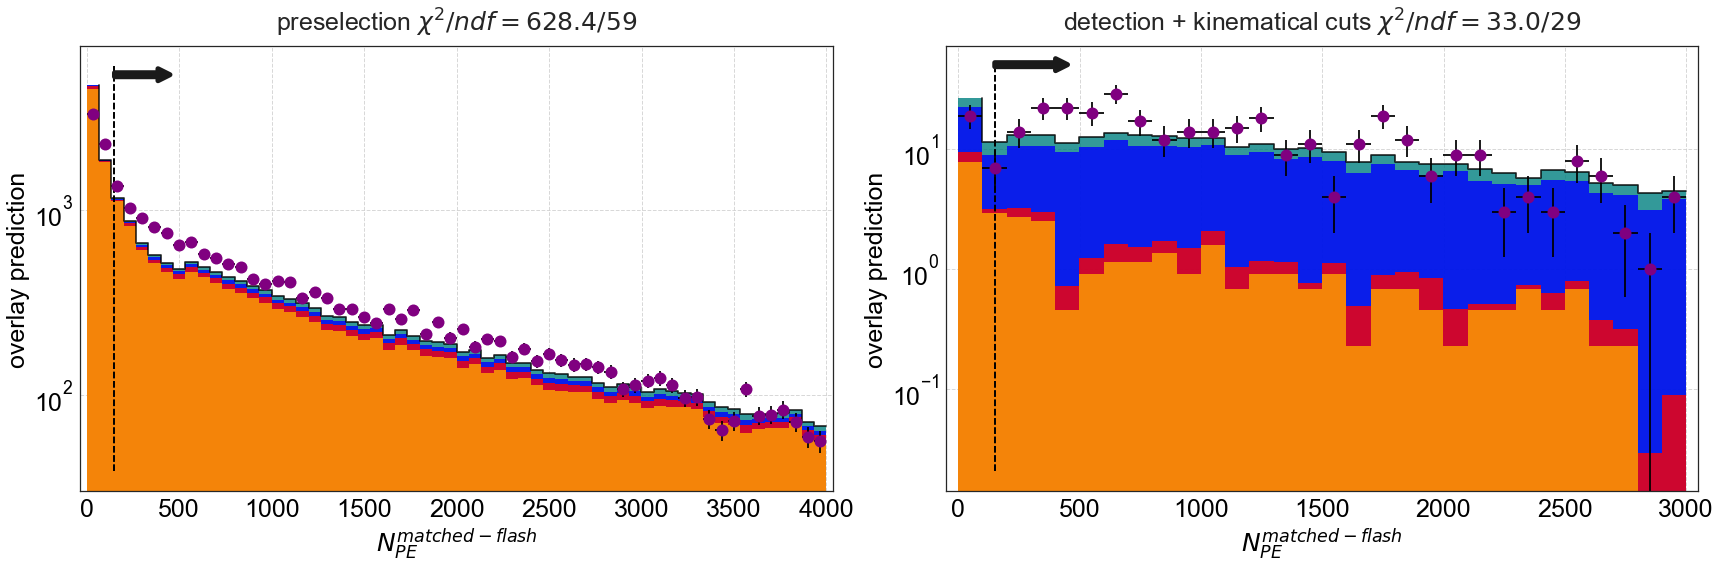

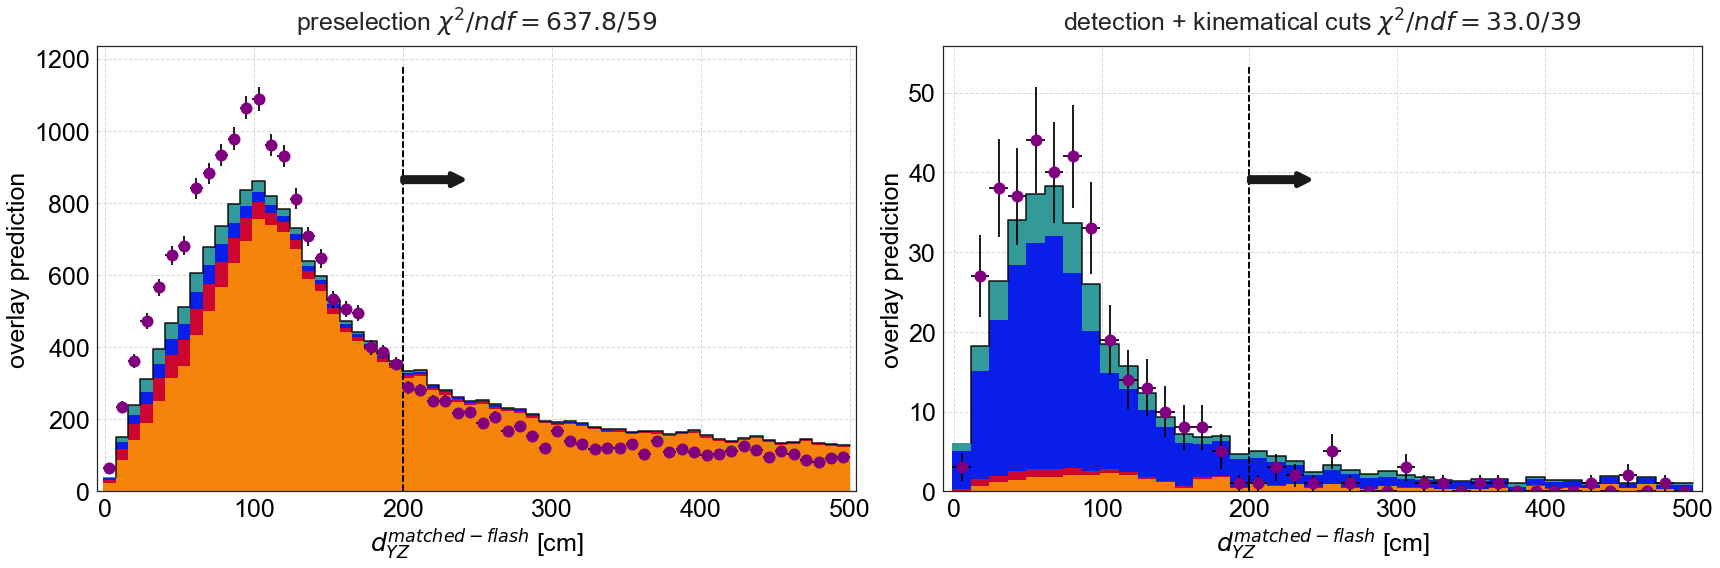

In [114]:
for ivar,(var,xlabel,bins_before_cuts,bins_after_cuts,chi2_xrange,x_varcut) in enumerate(zip(['TotalPE','TotalPE','YZdistance']
                                                                            ,[r'$N_{PE}^{matched-flash}$',r'$N_{PE}^{matched-flash}$',r'$d_{YZ}^{matched-flash}$ [cm]']
                                                                            ,[linspace(-1,4000,61),linspace(-1,4000,61),linspace(-1,500,61)]
                                                                            ,[linspace(-1,3000,31),linspace(-1,3000,31),linspace(-1,500,41)]
                                                                            ,[(0,4000),(0,4000),(0,400)]
                                                                            ,[(150,150),(150,150),(200,200)])):
    var = 'MatchedFlash_' + var
    plot_before_after_cuts(var=var,x_label=xlabel
                           ,bins_before_cuts=bins_before_cuts
                           ,last_cut_name='Pt & delta phi'
                           ,bins_after_cuts=bins_after_cuts
                           ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                    
                           ,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                           ,chi2_xrange=chi2_xrange,debug=0,x_varcut=x_varcut
                           ,dx=300 if ivar<2 else None
                           ,yscale='log' if ivar==1 else 'linear'
                       );
    filename=figures_path + var + '_log_before_after_cuts.pdf' if ivar==1 else figures_path + var + '_before_after_cuts.pdf'
    plt.savefig(filename)    
    print 'saved ',filename

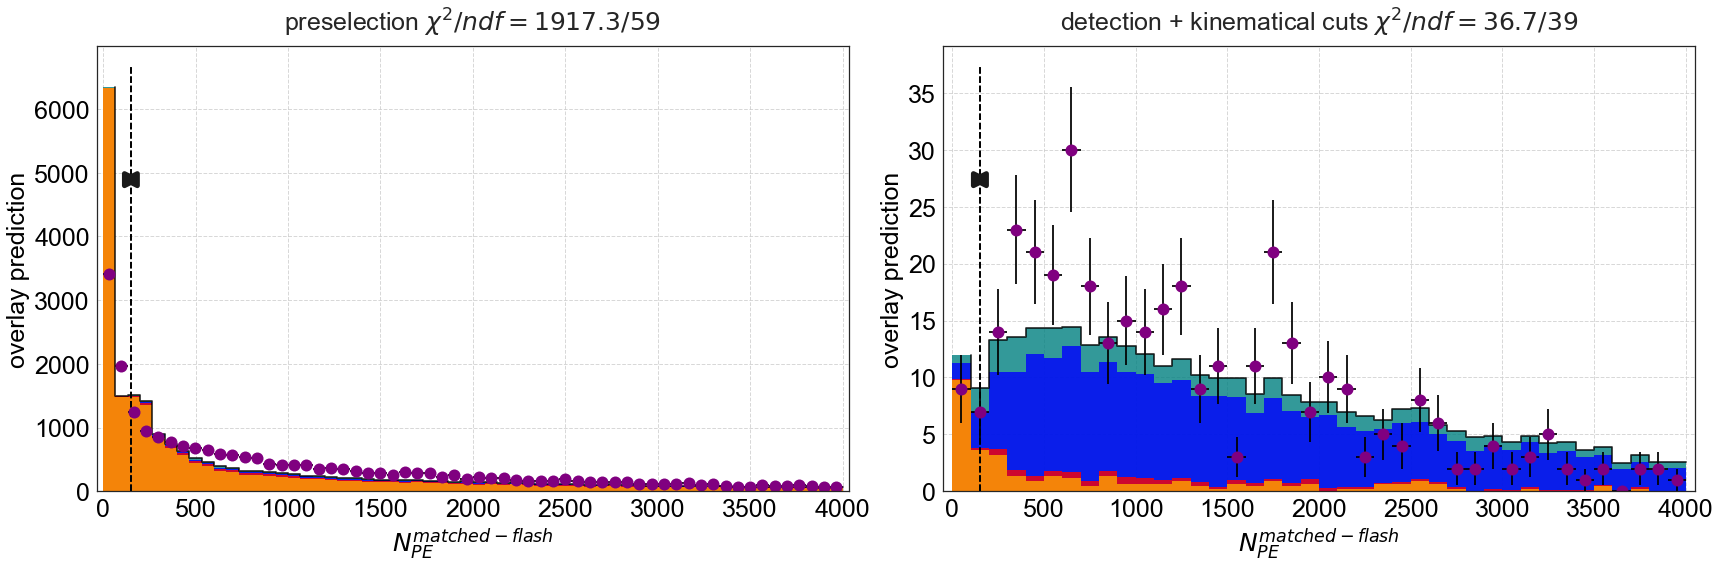

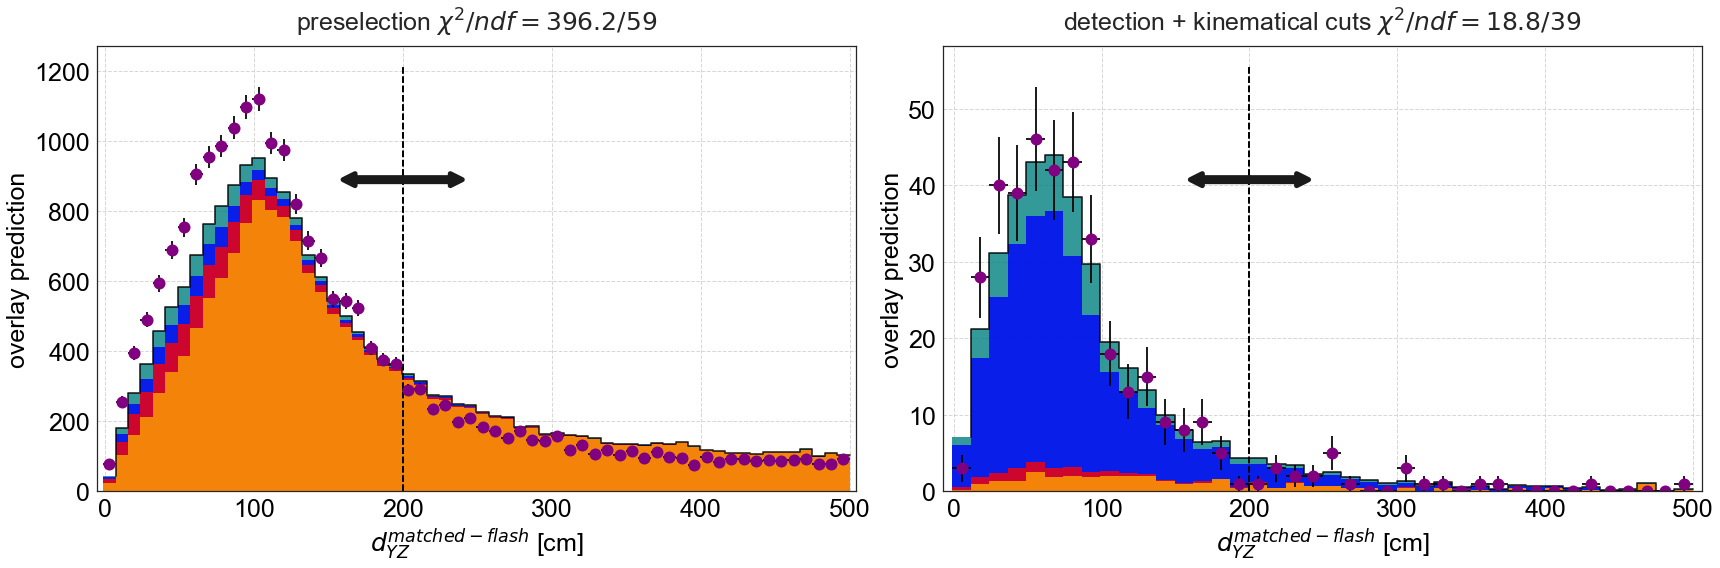

In [96]:
for var,xlabel,bins_before_cuts,bins_after_cuts,chi2_xrange,x_varcut in zip(['TotalPE','YZdistance']
                                                                            ,[r'$N_{PE}^{matched-flash}$',r'$d_{YZ}^{matched-flash}$ [cm]']
                                                                            ,[linspace(-1,4000,61),linspace(-1,500,61)]
                                                                            ,[linspace(-1,4000,41),linspace(-1,500,41)]
                                                                            ,[(0,4000),(0,400)]
                                                                            ,[(150,150),(200,200)]):
    var = 'ClosestFlash_' + var
    plot_before_after_cuts(var=var,x_label=xlabel
                           ,bins_before_cuts=bins_before_cuts
                           ,last_cut_name='Pt & delta phi'
                           ,bins_after_cuts=bins_after_cuts
                           ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                    
                           ,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                           ,chi2_xrange=chi2_xrange,debug=0,x_varcut=x_varcut
                       );



## length ($l_\mu - l_p$)

In [115]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
#                ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt & delta phi'
              ]
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


dx: 50
dx: 50


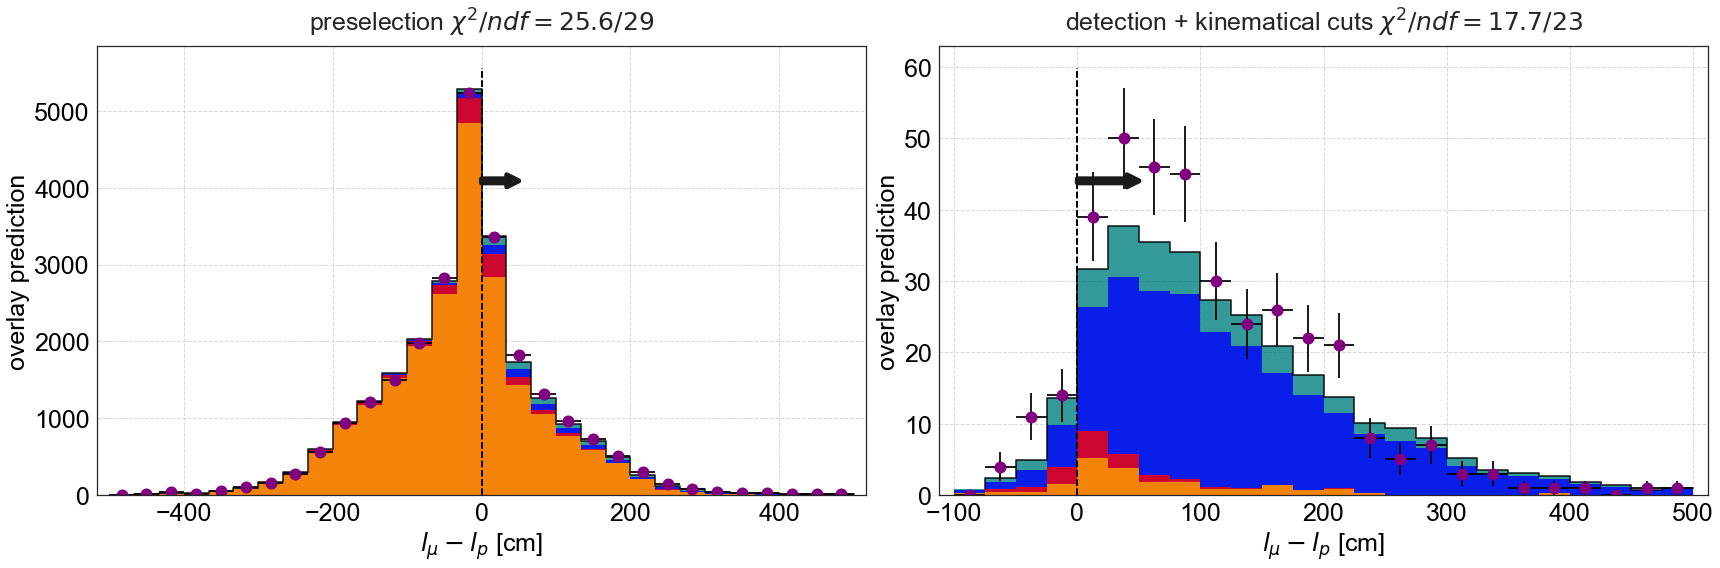

In [117]:
plot_before_after_cuts(var='l_mu-l_p',x_label= r'$l_{\mu}-l_p$ [cm]'
                       ,bins_before_cuts=linspace(-500,500,31)
                       ,last_cut_name='Pt & delta phi'
                       ,bins_after_cuts=linspace(-100,500,25)
                       ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                    
                       ,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                       ,chi2_xrange=(-100,500),debug=0,x_varcut=(0,0),dx=50
                   );
plt.savefig(figures_path+'length_before_after_cuts.pdf')

## vertex activity

In [118]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
#                ,'vertex activity'               
               ,'delta phi'               
               ,'Pt & delta phi'
              ]
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


dx: 0.122
dx: 0.122
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/overlay_rescaled_vs_BeamOn/RdQ_plane_0_before_after_cuts.pdf
dx: 0.122
dx: 0.122
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/overlay_rescaled_vs_BeamOn/RdQ_plane_1_before_after_cuts.pdf
dx: 0.122
dx: 0.122
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/overlay_rescaled_vs_BeamOn/RdQ_plane_2_before_after_cuts.pdf


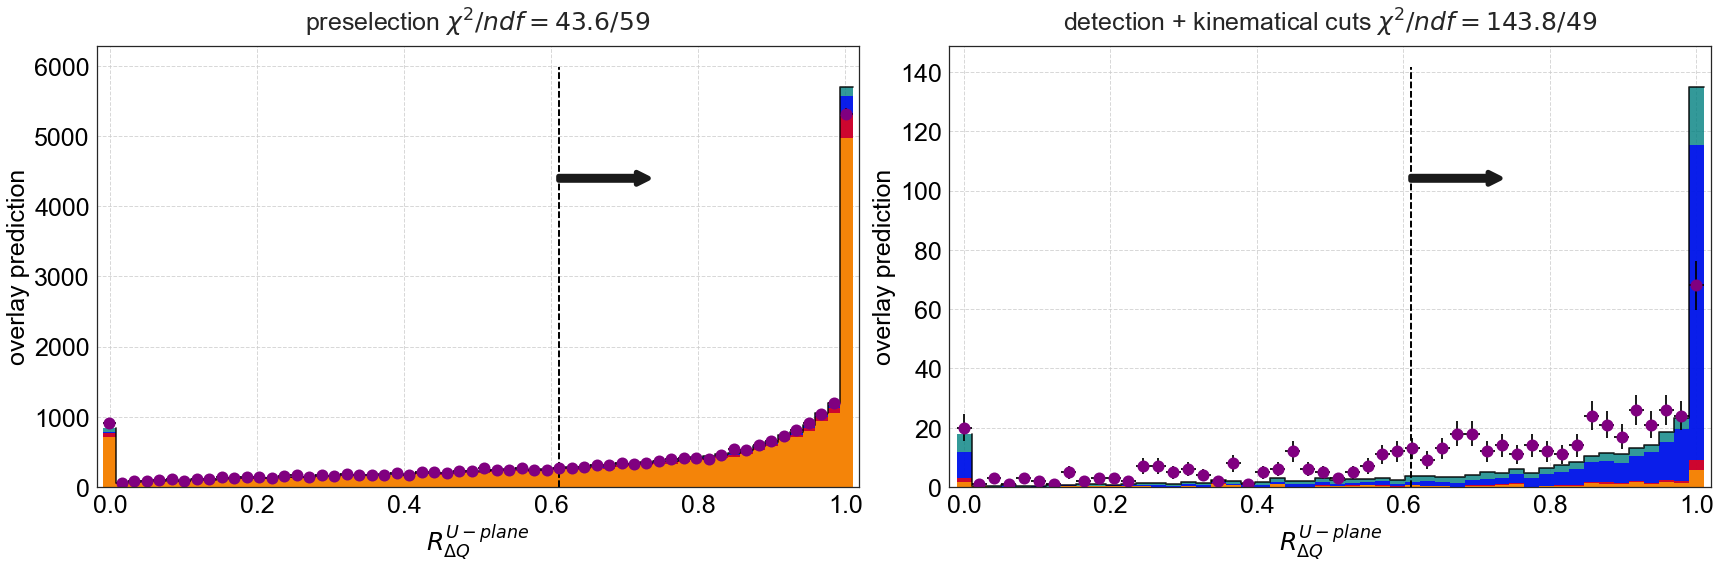

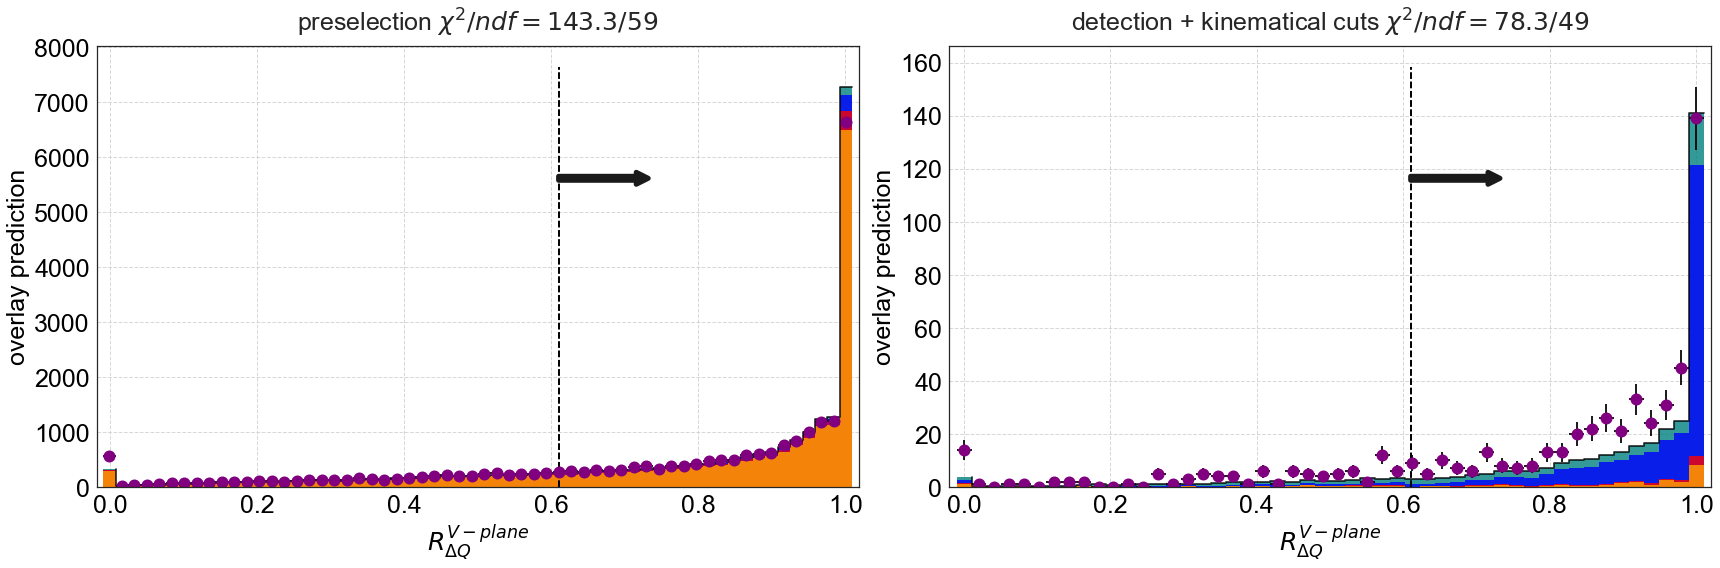

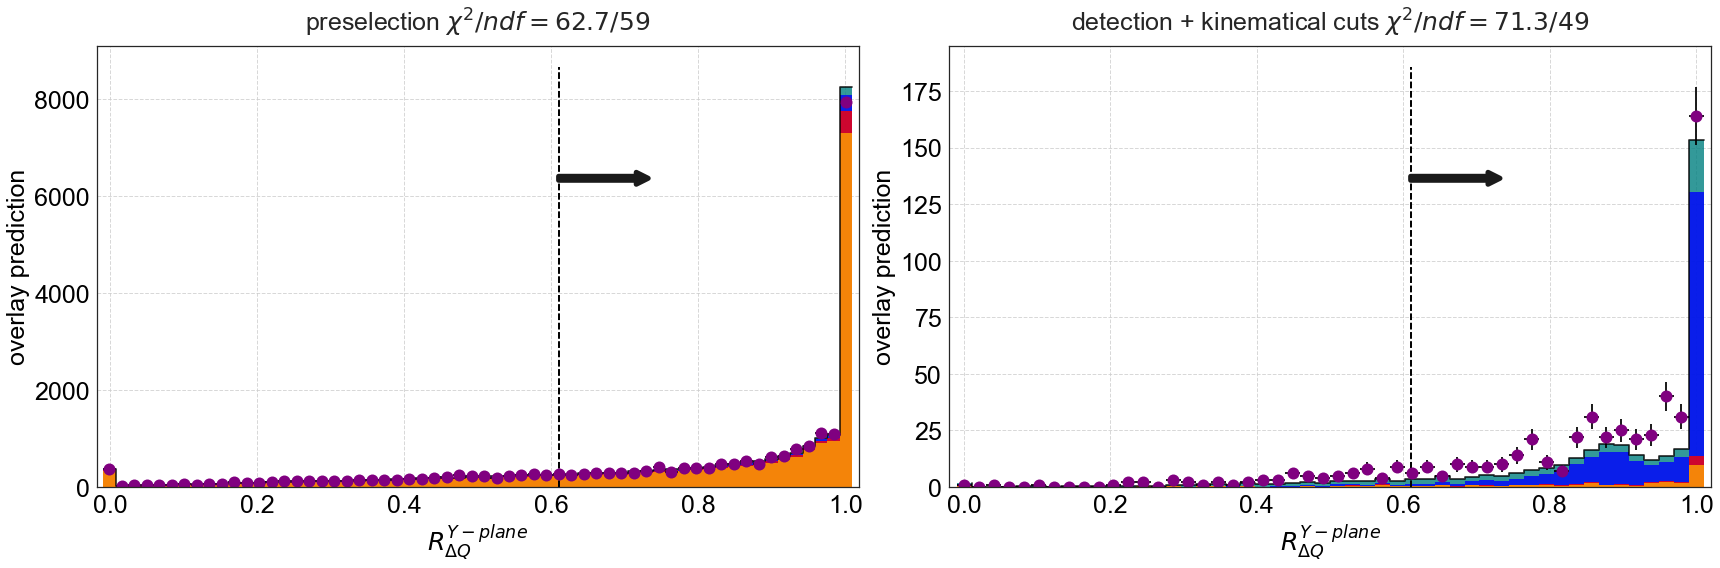

In [119]:
for plane,pname in zip([0,1,2],['U','V','Y']):
    plot_before_after_cuts(var='RdQaroundVertex[plane %d'%plane+'][50 wires x 100 ticks]'
                           ,x_label=  r'$R_{\Delta Q}^{'+pname+'-plane}$'
                           ,bins_before_cuts=linspace(-0.01,1.01,61)
                           ,bins_after_cuts=linspace(-0.01,1.01,51)
                           ,x_varcut=(0.61,0.61)
                           ,last_cut_name='Pt & delta phi'
                           ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                    
                           ,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                           ,chi2_xrange=(0,1)
                   )
    plt.savefig(figures_path+'RdQ_plane_%d'%plane+'_before_after_cuts.pdf')
    print 'saved',figures_path+'RdQ_plane_%d'%plane+'_before_after_cuts.pdf'

## $\Delta \phi$

In [125]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
#                ,'delta phi'               
               ,'Pt no delta phi'
              ]
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


preselection : sum of h_OnBeam: 24323 ,sum of h_stack: 24323.0
detection + kinematical cuts : sum of h_OnBeam: 662 ,sum of h_stack: 404.219746976


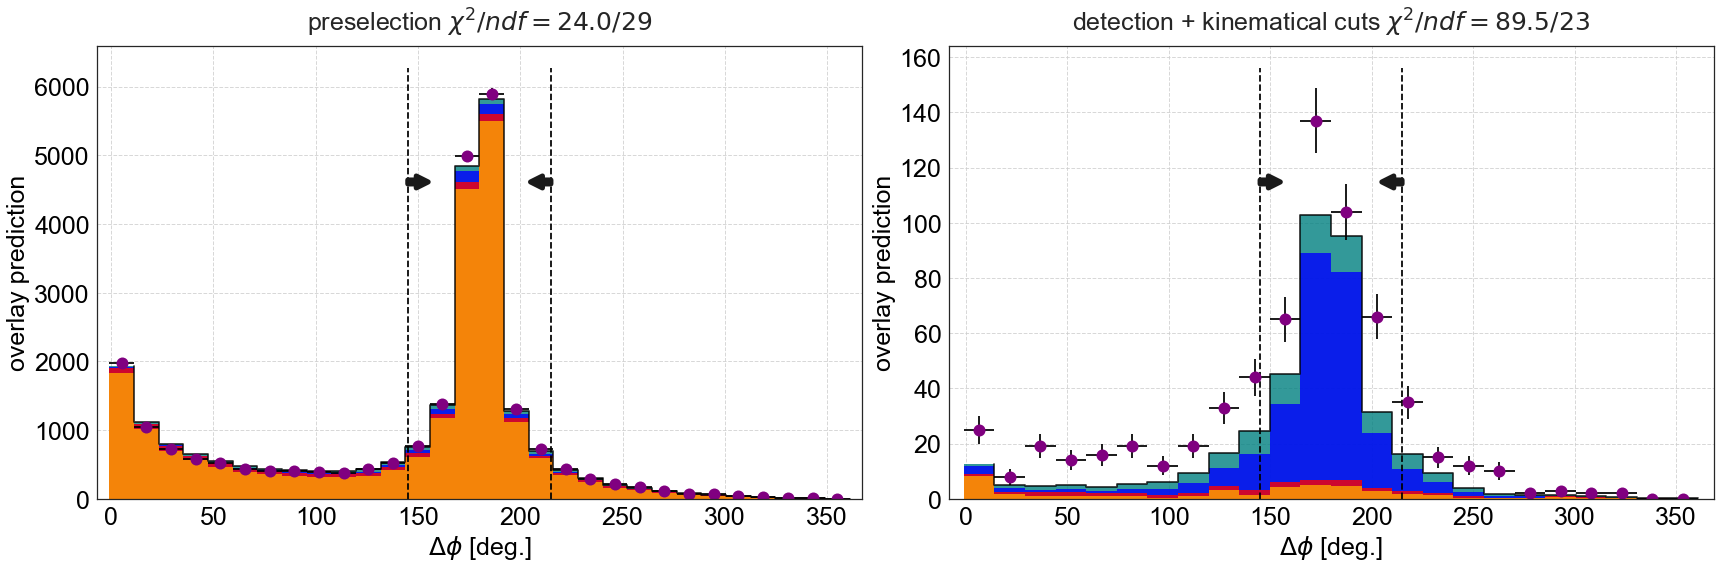

In [126]:
plot_before_after_cuts(var='delta_phi',x_label= r'$\Delta \phi$ [deg.]'
                       ,bins_before_cuts=linspace(-1,361,31)
                       ,last_cut_name='Pt no delta phi'
                       ,bins_after_cuts=linspace(-1,361,25)
                       ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                    
                       ,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                       ,chi2_xrange=(-1,361)
                       ,x_varcut=(145,215),dx=10,debug=2
                   );
plt.savefig(figures_path+'delta_phi_before_after_cuts.pdf')

## $p_t$

In [127]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
#                ,'Pt no delta phi'
              ]
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


preselection : sum of h_OnBeam: 24321 ,sum of h_stack: 24317.4580489
detection + kinematical cuts : sum of h_OnBeam: 401 ,sum of h_stack: 338.31428942


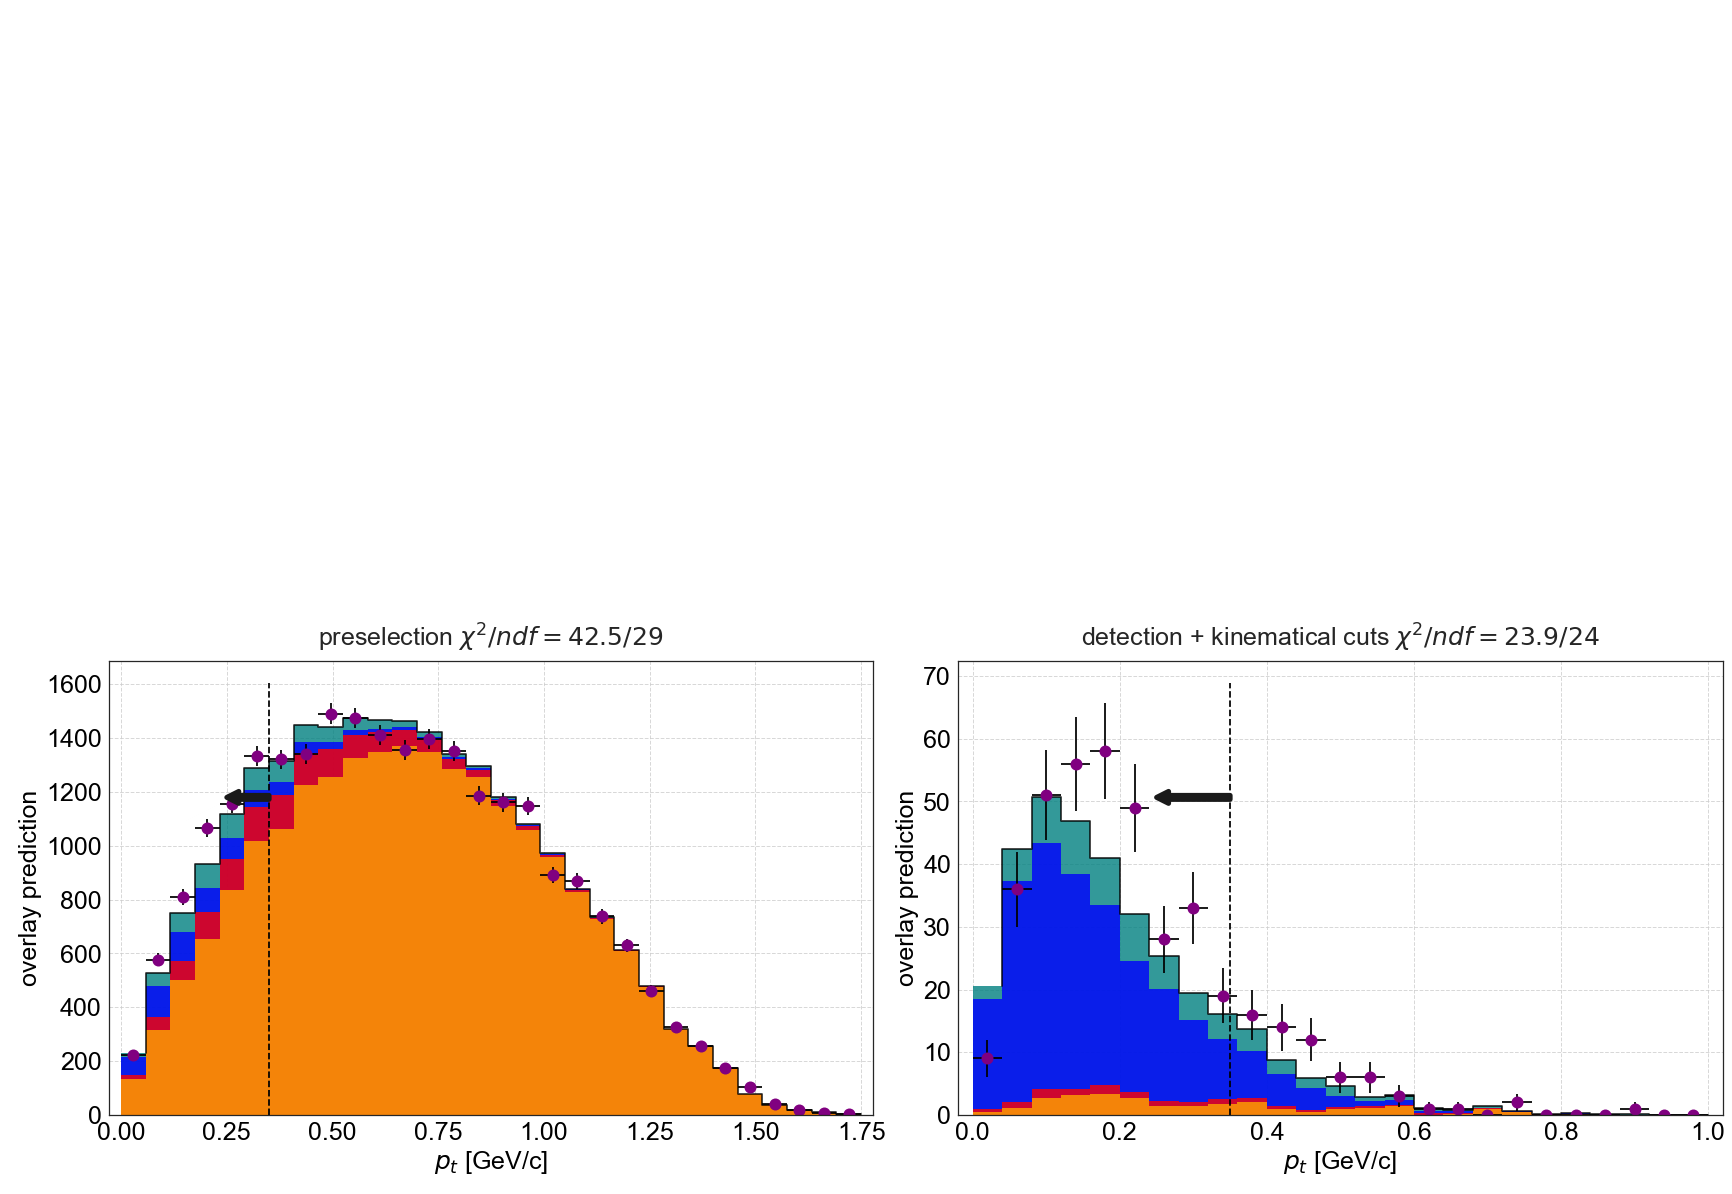

In [133]:
plot_before_after_cuts(var='reco_Pt',x_label=r'$p_{t}$ [GeV/c]'
                       ,bins_before_cuts=linspace(0,1.75,31)
                       ,last_cut_name='delta phi'
                       ,bins_after_cuts=linspace(0,1.,26)
                       ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                    
                       ,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                       ,chi2_xrange=(0,1.)
                       ,x_varcut=(-1,0.35),dx=0.1,debug=2
                   );
plt.savefig(figures_path+'Pt_before_after_cuts.pdf')